# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from tqdm import tqdm
from keras.callbacks import EarlyStopping,ModelCheckpoint
from sklearn.metrics import confusion_matrix , accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import glob
import pandas as pan
import matplotlib.pyplot as plotter
import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/defungi/H3/H3_5a_17.jpg
/kaggle/input/defungi/H3/H3_5b_9.jpg
/kaggle/input/defungi/H3/H3_11a_42.jpg
/kaggle/input/defungi/H3/H3_3c_16.jpg
/kaggle/input/defungi/H3/H3_36a_1.jpg
/kaggle/input/defungi/H3/H3_29a_3.jpg
/kaggle/input/defungi/H3/H3_9a_9.jpg
/kaggle/input/defungi/H3/H3_28a_3.jpg
/kaggle/input/defungi/H3/H3_35a_7.jpg
/kaggle/input/defungi/H3/H3_12b_1.jpg
/kaggle/input/defungi/H3/H3_1a_23.jpg
/kaggle/input/defungi/H3/H3_13a_39.jpg
/kaggle/input/defungi/H3/H3_10a_6.jpg
/kaggle/input/defungi/H3/H3_9b_5.jpg
/kaggle/input/defungi/H3/H3_4b_15.jpg
/kaggle/input/defungi/H3/H3_5a_35.jpg
/kaggle/input/defungi/H3/H3_35a_6.jpg
/kaggle/input/defungi/H3/H3_6b_17.jpg
/kaggle/input/defungi/H3/H3_5a_28.jpg
/kaggle/input/defungi/H3/H3_11a_49.jpg
/kaggle/input/defungi/H3/H3_5c_2.jpg
/kaggle/input/defungi/H3/H3_11b_13.jpg
/kaggle/input/defungi/H3/H3_6a_63.jpg
/kaggle/input/defungi/H3/H3_24a_2.jpg
/kaggle/input/defungi/H3/H3_6a_52.jpg
/kaggle/input/defungi/H3/H3_6a_12.jpg
/kaggle/inpu

In [3]:
#Create Files_Name
image_data='/kaggle/input/defungi'
pd.DataFrame(os.listdir(image_data),columns=['Files_Name'])

,Files_Name
0,H3
1,H6
2,H5
3,H1
4,H2


In [4]:
#Create Files_Name
#image_data='defungi'
pd.DataFrame(os.listdir(image_data),columns=['Files_Name'])

,Files_Name
0,H3
1,H6
2,H5
3,H1
4,H2


In [5]:
files = [i for i in glob.glob(image_data + "//*//*")]
np.random.shuffle(files)
labels = [os.path.dirname(i).split("/")[-1] for i in files]
data = zip(files, labels)
dataframe = pan.DataFrame(data, columns = ["Image", "Label"])
dataframe

,Image,Label
0,/kaggle/input/defungi/H1/H1_12b_15.jpg,H1
1,/kaggle/input/defungi/H1/H1_71a_3.jpg,H1
2,/kaggle/input/defungi/H6/H6_14a_2.jpg,H6
3,/kaggle/input/defungi/H5/H5_82a_2.jpg,H5
4,/kaggle/input/defungi/H1/H1_85b_7.jpg,H1
...,...,...
9109,/kaggle/input/defungi/H2/H2_3c_2.jpg,H2
9110,/kaggle/input/defungi/H1/H1_98a_6.jpg,H1
9111,/kaggle/input/defungi/H1/H1_50a_5.jpg,H1
9112,/kaggle/input/defungi/H1/H1_114a_13.jpg,H1


# Visualization

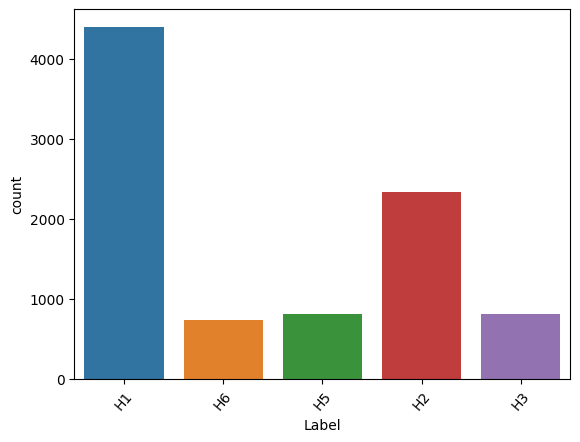

In [6]:
sns.countplot(x = dataframe["Label"])
plotter.xticks(rotation = 50);

# Split Train and Test Dataset

In [20]:
train_data_dir =image_data
batch_size = 16
target_size = (32,32)
validation_split = 0.2
train= tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    labels='inferred',
    label_mode='categorical',
    class_names=['H1','H2','H3','H5','H6'],
    validation_split=validation_split,
    subset="training",
    seed=100,
    image_size=target_size,
    batch_size=batch_size,
    shuffle=True,
)
validation= tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    labels='inferred',
    label_mode='categorical',
    class_names=['H1','H2','H3','H5','H6'],
    validation_split=validation_split,
    subset="validation",
    seed=100,
    image_size=target_size,
    batch_size=batch_size,
    shuffle=True,
)

Found 9114 files belonging to 5 classes.
Using 7292 files for training.
Found 9114 files belonging to 5 classes.
Using 1822 files for validation.


In [21]:
class_names = train.class_names
class_names

['H1', 'H2', 'H3', 'H5', 'H6']

## Model

In [43]:
from tensorflow.keras import models, layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization, Dropout, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [79]:
model_9 = models.Sequential()
model_9.add(layers.Conv2D(filters=256, kernel_size=(5, 5), strides=(1, 1), activation=tf.nn.relu, input_shape=(32, 32, 3)))
model_9.add(layers.MaxPooling2D((2, 2),strides=2))
model_9.add(layers.Conv2D(filters=512, kernel_size=(5, 5), strides=(1, 1), activation=tf.nn.relu))
model_9.add(layers.MaxPooling2D(pool_size=(2, 2),strides=2))
model_9.add(layers.Flatten())
model_9.add(layers.Dropout(0.5))
model_9.add(layers.Dense(units=512, activation=tf.nn.relu))
model_9.add(layers.Dense(units=5, activation=tf.nn.softmax))

In [80]:
model_9.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 28, 28, 256)       19456     
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 14, 14, 256)       0         
 ng2D)                                                           
                                                                 
 conv2d_18 (Conv2D)          (None, 10, 10, 512)       3277312   
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 5, 5, 512)         0         
 ng2D)                                                           
                                                                 
 flatten_7 (Flatten)         (None, 12800)             0         
                                                                 
 dropout_2 (Dropout)         (None, 12800)            

In [81]:
# Compile
model_9.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [82]:


earlystopping = tf.keras.callbacks.EarlyStopping(
    patience=2,
    monitor="val_accuracy",
    restore_best_weights=True
)


In [83]:
history_9 = model_9.fit(train
                    ,epochs=20
                    ,batch_size=512
                    ,validation_data=validation
                    ,callbacks=[earlystopping]
                   )


Epoch 1/20
456/456 [==============================] - 9s 16ms/step - loss: 5.8650 - accuracy: 0.4798 - val_loss: 1.7727 - val_accuracy: 0.2876
Epoch 2/20
456/456 [==============================] - 7s 15ms/step - loss: 1.3730 - accuracy: 0.4818 - val_loss: 1.3582 - val_accuracy: 0.4879
Epoch 3/20
456/456 [==============================] - 7s 15ms/step - loss: 1.3977 - accuracy: 0.4790 - val_loss: 1.3635 - val_accuracy: 0.4879
Epoch 4/20
456/456 [==============================] - 7s 15ms/step - loss: 1.3437 - accuracy: 0.4835 - val_loss: 1.3317 - val_accuracy: 0.4885
Epoch 5/20
456/456 [==============================] - 7s 15ms/step - loss: 1.3472 - accuracy: 0.4804 - val_loss: 1.3213 - val_accuracy: 0.4912
Epoch 6/20
456/456 [==============================] - 7s 14ms/step - loss: 1.5210 - accuracy: 0.4808 - val_loss: 1.3339 - val_accuracy: 0.4879
Epoch 7/20
456/456 [==============================] - 7s 15ms/step - loss: 1.3389 - accuracy: 0.4820 - val_loss: 1.3337 - val_accuracy: 0.4879

In [84]:
score, acc =  model_9.evaluate(validation)
print('Test Loss =', score)
print('Test Accuracy =', acc)

114/114 [==============================] - 1s 9ms/step - loss: 1.3213 - accuracy: 0.4912
Test Loss = 1.321260929107666
Test Accuracy = 0.4912184476852417


In [85]:
print(f"finetuned validation accuracy: {acc}")

finetuned validation accuracy: 0.4912184476852417


In [86]:
hist_=pd.DataFrame(history_9.history)
hist_

,loss,accuracy,val_loss,val_accuracy
0,5.864971,0.479841,1.772717,0.287596
1,1.372989,0.481761,1.358213,0.487925
2,1.397662,0.479018,1.363485,0.487925
3,1.343692,0.483544,1.331691,0.488474
4,1.347190,0.480389,1.321261,0.491218
5,1.521019,0.480801,1.333941,0.487925
6,1.338892,0.482035,1.333704,0.487925


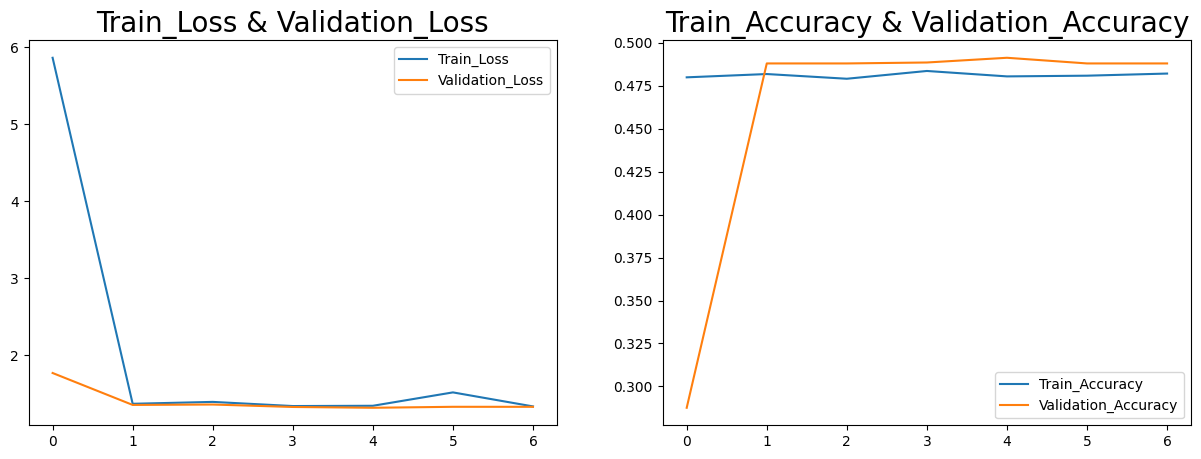

In [87]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(hist_['loss'],label='Train_Loss')
plt.plot(hist_['val_loss'],label='Validation_Loss')
plt.title('Train_Loss & Validation_Loss',fontsize=20)
plt.legend()
plt.subplot(1,2,2)
plt.plot(hist_['accuracy'],label='Train_Accuracy')
plt.plot(hist_['val_accuracy'],label='Validation_Accuracy')
plt.title('Train_Accuracy & Validation_Accuracy',fontsize=20)
plt.legend()